In [137]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
import time
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import Image
import matplotlib.font_manager as fm
fm.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rc('font', family='D2Coding')

<b><span style="color:white; background-color:red; font-size:150%">마크다운</span></b>

<b><span style="color:black; background-color:yellow; font-size:200%">게임 Battle Ground의 pc, 모바일, steam 별  
    인기순위를 분석하는 모형</span></b>


# BATTLEGROUNDS 란?

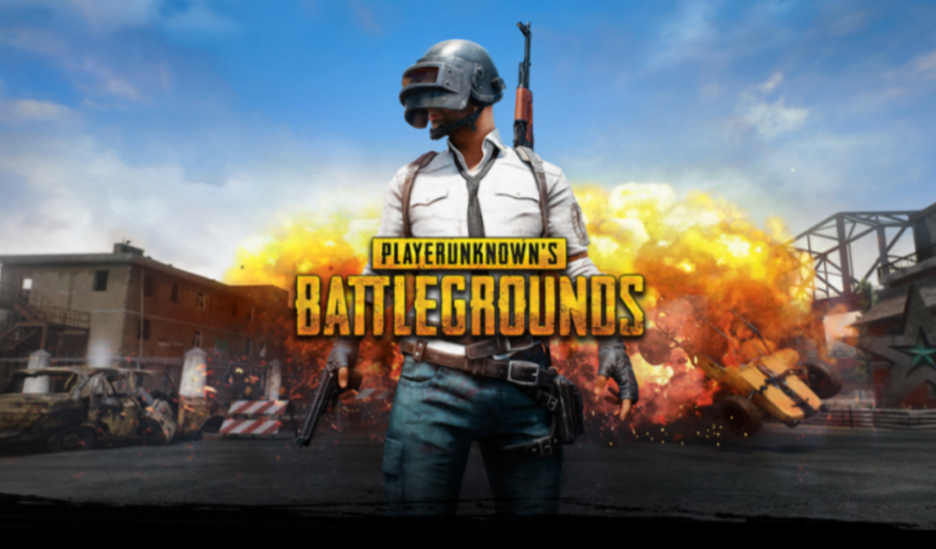

## BATTLEGROUNDS 기본 지식
인기  
장르  
유통사

## 분석 동기 및 이유

In [102]:
pc14 = pd.read_csv('C:/Users/X1Carbon/Documents/dev/gameData/the_log_data_manufac_csv/the_log_gamename_top.csv')
pc14.head(14)

,name,name.1
0,서든어택,286
1,아이온,286
2,메이플스토리,286
3,배틀그라운드,286
4,던전앤파이터,286
5,사이퍼즈,286
6,스타크래프트 리마스터,286
7,리니지,286
8,스타크래프트2,286
9,오버워치,286


__pc방 점유율에서 변하지 않는 14개 게임을 분석하던 중, 가장 변동률이 큰 배틀 그라운드가 눈에 띄었다.__

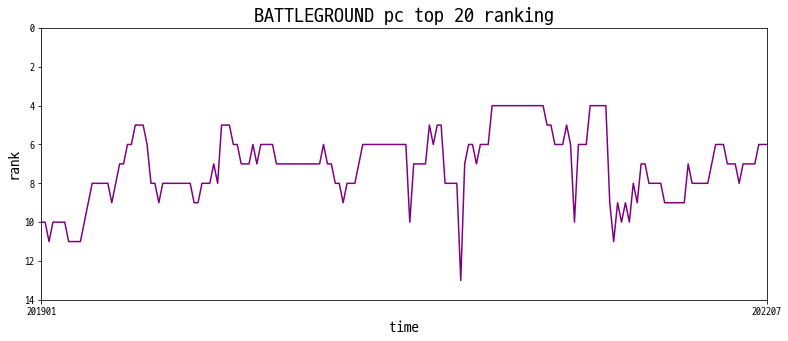

In [143]:
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1, 1, 1)
x=dfpop_p_bg['week_num']
y=dfpop_p_bg['rank']
plt.plot(x,y,
         color='purple')
plt.title('BATTLEGROUND pc top 20 ranking',size=20)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.xlim(0,185)
plt.ylim(14,0)
# ticklabel=['201811','202207']
ax.set_xticks([185,0],[202207,201901])
# ax.set_yticks([20,19,18,17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

BATTLEGROUNDS는 우리가 찾을 수 있는 pc, 모바일, 스팀 데이터 플랫폼에 모두 있는 게임이기 때문에 **상관관계**를 분석하기에 좋은 모델이라고 판단했다.  
그리고 팀원 중 BATTLEGROUNDS 게임 유저가 있었기 때문에 관련 배경지식을 쉽게 이해할 수 있었다.

# BATTLEGROUNDS data 수집 - DF 보여주기

data 수집방법 - 크롤링  
사유: 정리되어져 있는 파일이 없었기 때문에, 특정 사이트들에서 가져올 수 밖에 없었음

크롤링을 통해서만 데이터를 수집하기로 결정.  
훗날 후회하는 계기가 됨...

*크롤링 으로 csv 파일로 저장함  
크롤링방법  
1. Instant Data Scraper  
2. 셀레니움, 파이썬

##  y축
국민트리 : https://trees.gamemeca.com/
- 사이트 소개 : 
- 기준 선정 이유 : pc, 모바일, 스팀의 인기순위가 모두 있기 때문에 선정함
- 신용/신뢰 : 

국민트리_df.tail()_예시
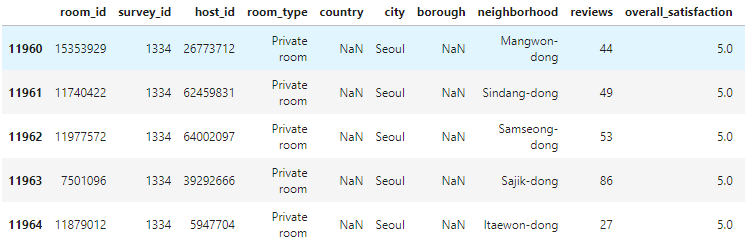

In [104]:
dfpop_p[['rank','name','company','type']].tail(5)

,rank,name,company,type
3715,16,마비노기,㈜넥슨코리아,MMORPG
3716,17,테일즈런너,㈜스마일게이트메가포트,레이싱
3717,18,오버워치,블리자드 엔터테인먼트,팀 기반 슈팅
3718,19,바람의나라,㈜넥슨코리아,MMORPG
3719,20,리니지,㈜엔씨소프트,MMORPG


## x축

### pc방 인기순위, 점유율 (가입하면 무료)
the log : https://www.thelog.co.kr/index.do
- 사이트 소개 : 
- 신용/신뢰 : 네이버에서 게임순위를 검색했을 때 출처가 되는 사이트이기 때문에 신뢰도 확보

In [108]:
# pc방_df.tail
dfpc[['rank','name','genre','distributor']].tail(5) 

,rank,name,genre,distributor
8575,26,검은사막,RPG,(주)펄어비스
8576,27,블레이드 & 소울,RPG,엔씨소프트
8577,28,크레이지아케이드,아케이드,넥슨
8578,29,엘소드,RPG,넥슨
8579,30,카운터-스트라이크 온라인,FPS,넥슨


In [8]:
# pc방 점유율_df_항목

rank : pc방 점유율 순위
name : 게임명
genre : 장르
distributor : 유통사

### 모바일 인기순위, 수익, 유저 (일정기간까지 무료로 볼 수 있음)
mobileindex : https://www.mobileindex.com/mi-chart/weekly-rank/revenue #수익
              https://www.mobileindex.com/mi-chart/weekly-rank/user #유저
- 사이트 소개 : 
- 신용/신뢰? 구글, 삼성전자, 네이버, 쿠팡 등 대기업이 금액을 지불하여 data를 가져온 것으로 보아 신뢰도 확보

In [109]:
# 모바일_df.tail()
dfr[['rank','app_name']].tail(5)

,rank,app_name
4015,26,한게임 포커
4016,27,뮤오리진3
4017,28,세븐나이츠 레볼루션
4018,29,제2의 나라: Cross Worlds
4019,30,R2M


In [20]:
# 모바일_df_항목

rank : 모바일 수익 순위
app_name : 게임 이름

### 아프리카 인기순위, 방송 점유율 (일정기간까지 무료로 볼 수 있음)
아프리카 : https://gameranking.afreecatv.com/
- 사이트 소개 : 
- 신용/신뢰? 

In [110]:
# 아프리카_df.tail()
dfa[['broad_rank','name','broad_share']].tail(5)

,broad_rank,name,broad_share
4285,26,테일즈런너,0.2%
4286,27,던파,0.2%
4287,28,R2,0.1%
4288,29,오버워치,0.1%
4289,30,거상,0.1%


In [23]:
# 아프리카_df_항목
broad_rank : 방송 점유 순위
name : 게임명
broad_share : 방송 점유율 

In [24]:
# 아프리카_df_사용 가능한 데이터

# 데이터 전처리

크롤링한 데이터의 경우에는 데이터 전처리가 필요

'항목'에 따른 데이터 처리_예시
- 항목 : week_num ... 


In [ ]:
dfr['week_num'] = 133 - dfr.index // 30

__2022년 7월 마지막주를 0으로 하여 역방향으로 숫자를 부여하였다.__

# BATTLEGROUNDS 데이터 분석

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
import time
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import Image

## BATTLEGROUNDS  DataFrame 가져오기 -> GRAPH 보여줌=시각화

In [73]:
#github에 모두 push 한 후 가져오기

# 기준data
#game popularity ranking
dfpop_p = pd.read_csv('C:/Users/X1Carbon/Documents/dev/gameData/game_tree_graph/pretty_pc_graph.csv',encoding = 'utf-8') #pc 인기순위
dfpop_m = pd.read_csv('C:/Users/X1Carbon/Documents/dev/gameData/game_tree_graph/pretty_mobile_graph.csv',encoding = 'utf-8') #모바일 인기순위
dfpop_s = pd.read_csv('C:/Users/X1Carbon/Documents/dev/gameData/game_tree_graph/pretty_steam_graph.csv',encoding = 'utf-8') #스팀 인기순위
                                              # 스팀
                                              # - 비교변수를 찾지 못함 
                                              # - 하지만 BATTLEGROUNDS 게임이 'steam' 에도 있기 때문에 종속변수들 사이에서도 영향이 있을 것으로 추정되어 데이터를 가져오게 되었음


# 변수data
#pc_room 
dfpc = pd.read_csv("C:/Users/X1Carbon/Documents/dev/gameData/the_log_data_manufac_csv/the_log_weeknum.csv",encoding='utf-8')

#모바일
dfr = pd.read_csv('C:/Users/X1Carbon/Documents/dev/gameData/mobile_revenue/mobile_revenue_rank_30.csv',encoding='utf-8') #모바일 수익
dfu = pd.read_csv('C:/Users/X1Carbon/Documents/dev/gameData/mobile_user/mobile_user_rank_30.csv',encoding='utf-8') #모바일 유저

#아프리카tv: 인터넷방송 (pc, 모바일 같이 있는 data, 하지만 거의 pc가 점유율이 높음)
dfa = pd.read_csv('C:/Users/X1Carbon/Documents/dev/gameData/ffinalafreecatv.csv') 

In [74]:
dfr['week_num'] = 133 - dfr.index // 30
dfu['week_num'] = 133 - dfu.index // 30

## DataFrame  
1.비교,  
2.모형(회귀, 잔차의 분포, 다중공선성,..),  
3.y=fx(할수있다면..ㅋ)
- 각 데이터를 합쳐서 사용하지 않고 각 플랫폼(pc,모바일,steam)으로 나누어 비교함
- 기준 vs 기준
- 기준 vs 변수
- 변수 vs 변수

In [76]:
dfa_bg = dfa.loc[dfa['name'] == '배틀그라운드']
dfu_bg = dfu.loc[dfu['app_name'] == '배틀그라운드']
dfr_bg = dfr.loc[dfr['app_name'] == '배틀그라운드']
dfpop_m_bg = dfpop_m.loc[dfpop_m['name'] == '배틀그라운드 모바일']
dfpop_p_bg = dfpop_p.loc[dfpop_p['name'] == '배틀그라운드']
dfpop_s_bg = dfpop_s.loc[dfpop_s['name'] == '플레이어언노운스 배틀그라운드']
dfpc_bg = dfpc.loc[dfpc['name'] == '배틀그라운드']

### 기준 vs 기준

#### pc 인기순위 vs 스팀 인기순위 vs 모바일 인기순위

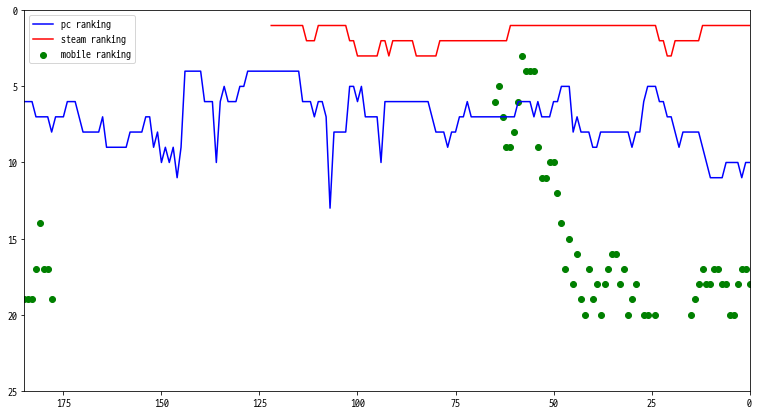

In [146]:
plt.figure(figsize = (13, 7))
plt.plot(dfpop_p_bg['week_num'],dfpop_p_bg['rank'], color = 'blue', label = 'pc ranking')
plt.plot(dfpop_s_bg['week_num'],dfpop_s_bg['rank'], color = 'red', label = 'steam ranking')
plt.scatter(dfpop_m_bg['week_num'],dfpop_m_bg['rank'], color = 'green', label = 'mobile ranking')
#sns.swarmplot(data=dfpop_m_bg, x="week_num", y="rank")
plt.ylim(25,0)
plt.xlim(185,0)
ax.set_xticks([185,0],[202207,201901])
plt.legend()
plt.show()

**pc와 모바일 배틀 그라운드가 역의 상관관계가 있을 것이라고 생각했던 것과는 다르게,  
서로 관계를 찾을 수 없었습니다.**

### 기준 vs 변수

<b><span style="color:black; background-color:aliceblue; font-size:120%">기준 : pc 인기순위</span></b>

#### pc 인기순위 vs pc 방

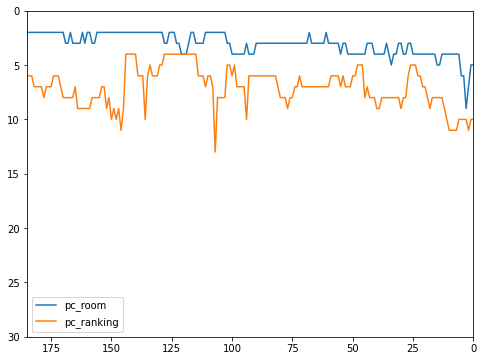

In [71]:
plt.figure(figsize = (8, 6))
plt.plot(dfpc_bg['week_num'],dfpc_bg['rank'],label = 'pc_room')
plt.plot(dfpop_p_bg['week_num'],dfpop_p_bg['rank'], label = 'pc_ranking')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

#### pc 인기순위 vs 모바일 수익

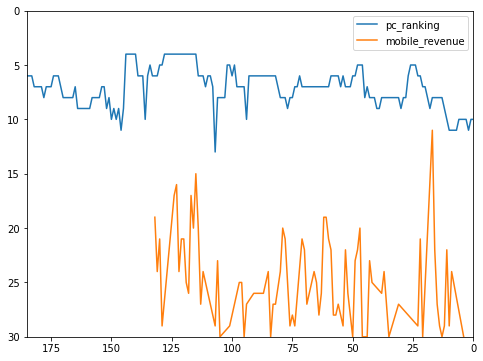

In [77]:
plt.figure(figsize = (8, 6))
plt.plot(dfpop_p_bg['week_num'],dfpop_p_bg['rank'], label = 'pc_ranking')
plt.plot(dfr_bg['week_num'],dfr_bg['rank'], label = 'mobile_revenue')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

#### pc 인기순위 vs 모바일 유저

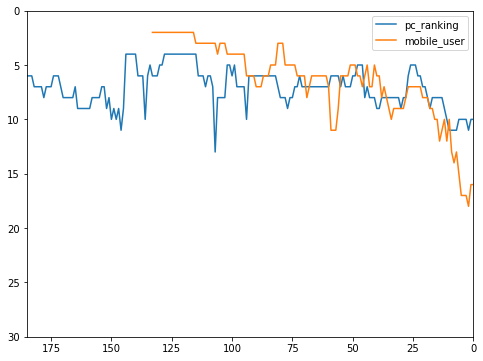

In [80]:
plt.figure(figsize = (8, 6))
plt.plot(dfpop_p_bg['week_num'],dfpop_p_bg['rank'], label = 'pc_ranking')
plt.plot(dfu_bg['week_num'],dfu_bg['rank'], label = 'mobile_user')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

In [120]:
i = dfpop_p[dfpop_p['week_num']>133].index
dfpop_p2=dfpop_p.drop(i)
dfpop_p2_bg=dfpop_p2.loc[dfpop_p2['name']=='배틀그라운드']

In [121]:
# 배그의 모바일 사용자수와 pc 순위의 상관관계 검정
dfu_bg=dfu.loc[dfu['app_name']=='배틀그라운드']
dfpop_p2_bg=dfpop_p2.loc[dfpop_p2['name']=='배틀그라운드']
corr_p=stats.pearsonr(dfu_bg['rank'],dfpop_p2_bg['rank'])
corr_p

(0.6588994897584821, 4.968724663571773e-18)

**유의수준이 0.05일때, 상관관계 검정의 p값이 0.05보다 작으므로 가설을 기각합니다.  
따라서 배그의 pc 순위와 모바일 유저수는 상관이 있다고 할 수 있습니다.**

#### pc 인기순위 vs 아프리카tv

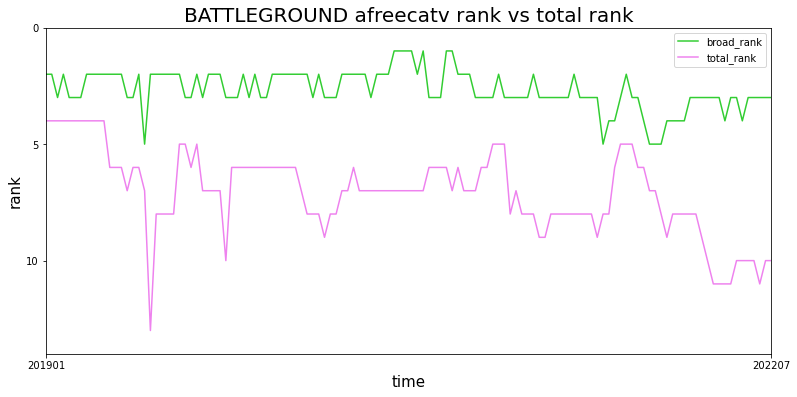

In [111]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
x1=dfa_bg['week_num']
y1=dfa_bg['broad_rank']
x2=dfpop_p_bg['week_num']
y2=dfpop_p_bg['rank']
plt.plot(x1,y1,color='limegreen', label='broad_rank') 
plt.plot(x2,y2,color='violet', label='total_rank' )
plt.title('BATTLEGROUND afreecatv rank vs total rank',size=20)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
plt.ylim(14,0)
plt.xlim(125,0)
ax.set_xticks([125,0],[201901,202207])
ax.set_yticks([10,5,0])

In [118]:
# 배그의 아프리카 tv 방송 순위와 pc 순위의 상관관계 검정
import scipy.stats as stats
i = dfpop_p[dfpop_p['week_num']>142].index
dfpop_p1=dfpop_p.drop(i)
dfpop_p1_bg=dfpop_p1.loc[dfpop_p1['name']=='배틀그라운드']
corr_p=stats.pearsonr(dfa_bg['broad_rank'],dfpop_p1_bg['rank'])
corr_p

(0.30477054588568764, 0.00021476470927509752)

In [123]:
# 피파온라인4의 pc 순위 vs 아프리카 tv 방송 순위
dfa_f=dfa.loc[dfa['name']=='피파온라인4']
dfpop_p1_f=dfpop_p1.loc[dfpop_p1['name']=='피파온라인4']
corr_p=stats.pearsonr(dfa_f['broad_rank'],dfpop_p1_f['rank'])
corr_p

(0.15032408532295588, 0.07312737000726562)

**유의수준이 0.05일때, 상관관계 검정의 p값이 0.05보다 크므로 가설을 기각하지 못합니다.  
따라서 피파온라인4의 pc 순위와 아프리카tv 방송 점유율 순위는 상관이 있다고 할 수 없습니다.**

<b><span style="color:black; background-color:aliceblue; font-size:120%">기준 : 모바일 인기순위</span></b>

#### 모바일 인기순위 vs pc 방

#### 모바일 인기순위 vs 모바일 수익

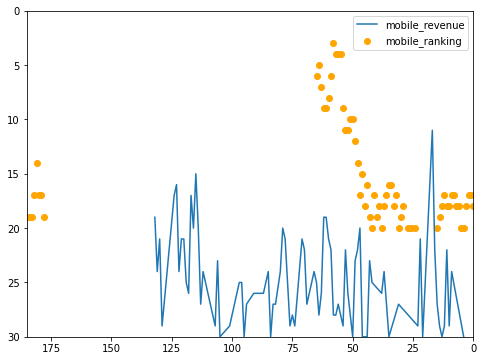

In [81]:
plt.figure(figsize = (8, 6))
plt.plot(dfr_bg['week_num'],dfr_bg['rank'], label = 'mobile_revenue')
plt.scatter(dfpop_m_bg['week_num'],dfpop_m_bg['rank'], label = 'mobile_ranking', color = 'orange')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

#### 모바일 인기순위 vs 모바일 유저

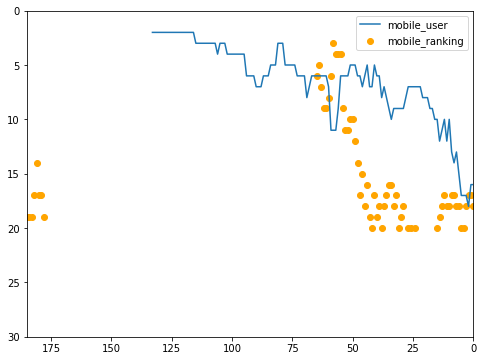

In [84]:
plt.figure(figsize = (8, 6))
plt.plot(dfu_bg['week_num'],dfu_bg['rank'], label = 'mobile_user')
plt.scatter(dfpop_m_bg['week_num'],dfpop_m_bg['rank'], label = 'mobile_ranking',
            color = 'orange')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

#### 모바일 인기순위 vs 아프리카tv

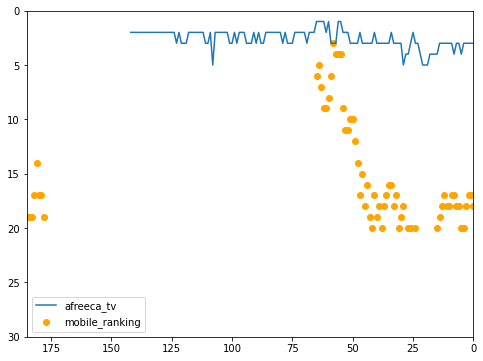

In [86]:
plt.figure(figsize = (8, 6))
plt.plot(dfa_bg['week_num'],dfa_bg['broad_rank'], label = 'afreeca_tv')
plt.scatter(dfpop_m_bg['week_num'],dfpop_m_bg['rank'], label = 'mobile_ranking',
            color = 'orange')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

<b><span style="color:black; background-color:aliceblue; font-size:120%">기준 : 스팀 인기순위</span></b>

#### 스팀 인기순위 vs pc 방

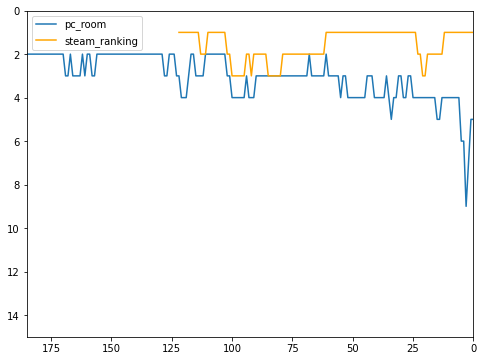

In [89]:
plt.figure(figsize = (8, 6))
plt.plot(dfpc_bg['week_num'],dfpc_bg['rank'], label = 'pc_room')
plt.plot(dfpop_s_bg['week_num'],dfpop_s_bg['rank'], label = 'steam_ranking',
            color = 'orange')
plt.ylim(15,0)
plt.xlim(185,0)
plt.legend()
plt.show()

#### 스팀 인기순위 vs 모바일 수익

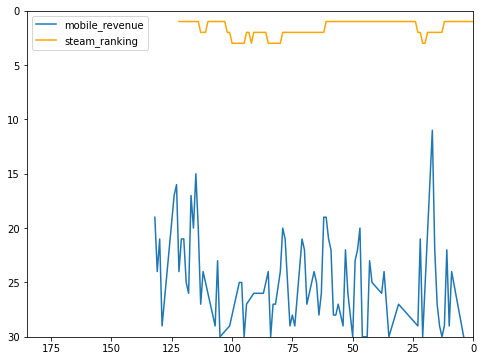

In [90]:
plt.figure(figsize = (8, 6))
plt.plot(dfr_bg['week_num'],dfr_bg['rank'], label = 'mobile_revenue')
plt.plot(dfpop_s_bg['week_num'],dfpop_s_bg['rank'], label = 'steam_ranking',
            color = 'orange')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

In [130]:
i = dfu[dfu['week_num']>122].index
dfu1=dfu.drop(i)
dfu1_bg=dfu1.loc[dfu['app_name']=='배틀그라운드']
corr_p=stats.pearsonr(dfpop_s_bg['rank'],dfu1_bg['rank'])
corr_p

(-0.2526177101237188, 0.004818386317088101)

**역의 관계가 있는 것처럼 보이지만, 스팀 랭킹은 항상 상위권에 있고 모바일 수익 랭킹은 변동이 많아 관계가 있다고 보기에는 어려워 보입니다.**

#### 스팀 인기순위 vs 모바일 유저

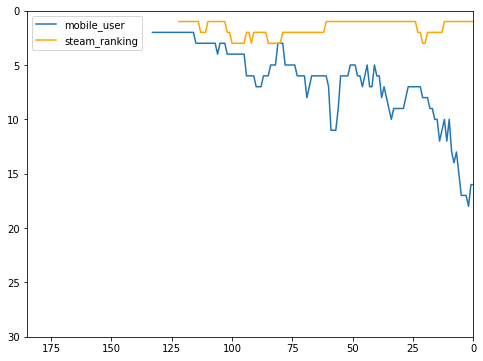

In [91]:
plt.figure(figsize = (8, 6))
plt.plot(dfu_bg['week_num'],dfu_bg['rank'], label = 'mobile_user')
plt.plot(dfpop_s_bg['week_num'],dfpop_s_bg['rank'], label = 'steam_ranking',
            color = 'orange')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

#### 스팀 인기순위 vs 아프리카tv

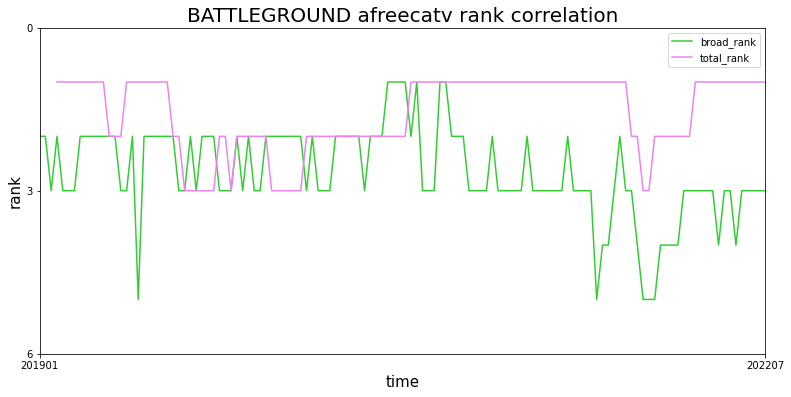

In [125]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1, 1, 1)
x1=dfa_bg['week_num']
y1=dfa_bg['broad_rank']
x2=dfpop_s_bg['week_num']
y2=dfpop_s_bg['rank']
plt.plot(x1,y1,color='limegreen', label='broad_rank') 
plt.plot(x2,y2,color='violet', label='total_rank' )
plt.title('BATTLEGROUND afreecatv rank correlation',size=20)
plt.xlabel('time', size=15)
plt.ylabel('rank', size=15)
plt.legend(loc='best')
plt.ylim(5,0)
plt.xlim(125,0)
ax.set_xticks([125,0],[201901,202207])
ax.set_yticks([6,3,0])

In [127]:
i = dfa[dfa['week_num']>122].index
dfa1=dfa.drop(i)
dfa1_bg=dfa1.loc[dfa1['name']=='배틀그라운드']
corr_p=stats.pearsonr(dfa1_bg['broad_rank'],dfpop_s_bg['rank'])
corr_p

(-0.07155537887582586, 0.4315783924361228)

**유의수준이 0.05일때, 상관관계 검정의 p값이 0.05보다 크므로 가설을 기각할 수 없습니다.  
따라서 배그의 스팀 순위와 아프리카tv 방송 점유율 순위는 상관이 있다고 할 수 없습니다.**

### 변수 vs 변수

#### pc 방 vs 모바일 수익

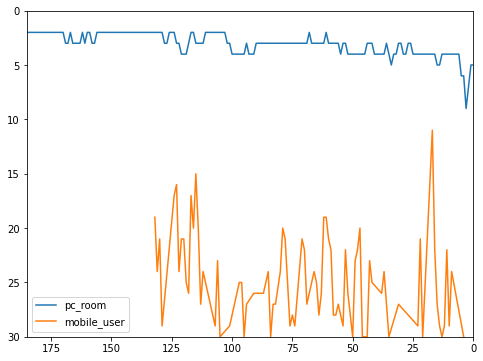

In [94]:
plt.figure(figsize = (8, 6))
plt.plot(dfpc_bg['week_num'],dfpc_bg['rank'], label = 'pc_room')
plt.plot(dfr_bg['week_num'],dfr_bg['rank'], label = 'mobile_user')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

#### pc 방 vs 모바일 유저

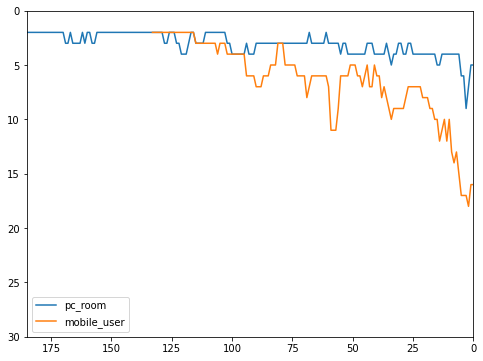

In [93]:
plt.figure(figsize = (8, 6))
plt.plot(dfpc_bg['week_num'],dfpc_bg['rank'], label = 'pc_room')
plt.plot(dfu_bg['week_num'],dfu_bg['rank'], label = 'mobile_user')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

#### pc 방 vs 아프리카tv

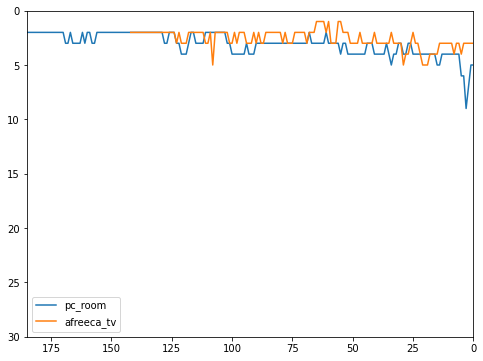

In [95]:
plt.figure(figsize = (8, 6))
plt.plot(dfpc_bg['week_num'],dfpc_bg['rank'], label = 'pc_room')
plt.plot(dfa_bg['week_num'],dfa_bg['broad_rank'], label = 'afreeca_tv')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

#### 모바일 수익 vs 모바일 유저

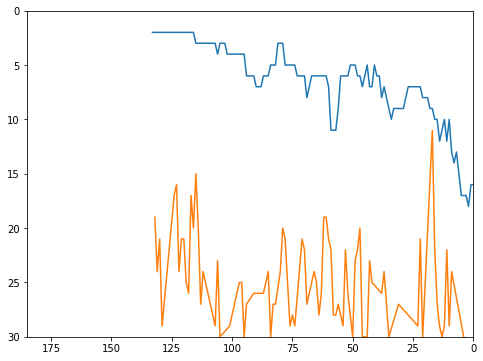

In [19]:
plt.figure(figsize = (8, 6))
plt.plot(dfu_bg['week_num'],dfu_bg['rank'])
plt.plot(dfr_bg['week_num'],dfr_bg['rank'])
plt.ylim(30,0)
plt.xlim(185,0)
plt.show()

#### 모바일 수익 vs 아프리카tv

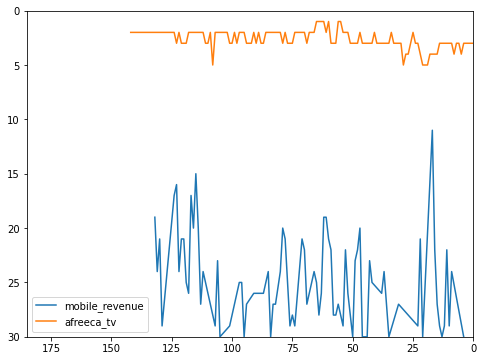

In [99]:
plt.figure(figsize = (8, 6))
plt.plot(dfr_bg['week_num'],dfr_bg['rank'], label = 'mobile_revenue')
plt.plot(dfa_bg['week_num'],dfa_bg['broad_rank'], label = 'afreeca_tv')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

#### 모바일 유저 vs 아프리카tv

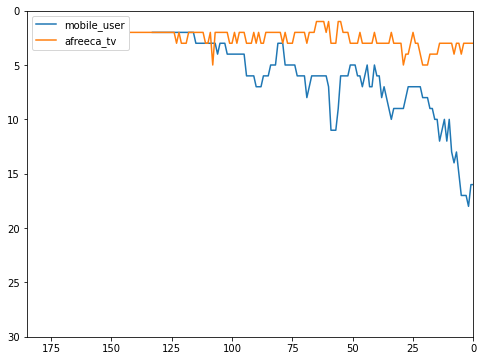

In [98]:
plt.figure(figsize = (8, 6))
plt.plot(dfu_bg['week_num'],dfu_bg['rank'], label = 'mobile_user')
plt.plot(dfa_bg['week_num'],dfa_bg['broad_rank'], label = 'afreeca_tv')
plt.ylim(30,0)
plt.xlim(185,0)
plt.legend()
plt.show()

# 결론

In [144]:
df_article = pd.read_excel("C:/Users/X1Carbon/Desktop/hack_article_final.xlsx")
df_article[['일자','제목']]

,일자,제목
0,20220222,"""탕탕 으악"" 어디서 쏘나 했더니 게임핵 판매책 20대 집행유예"
1,20220218,게임 조작 프로그램 수억원대 유통한 20대 집행유예
2,20220218,"'게임핵' 7억원 어치 불법판매, 집행유예"
3,20220218,불법 게임 조작 프로그램 7억여원어치 유통 20대 집행유예
4,20220218,불법 게임 조작 프로그램 유통한 20대 집행유예
5,20210210,"""게임을 글로 배운 판결"" '에임핵'이 악성프로그램 아니라는 대법원에 의문 품은 판사"
6,20201112,"김경협, 게임산업진흥에 관한 법률 개정안 발의"
7,20201003,"""핵 때문에 못해먹겠다!"" 배그 떠나는 유저들"
8,20200625,배틀그라운드 ‘핵과의 전쟁’ 선포
9,20200625,“도저히 못 참겠다!” 배그 ‘핵’과의 전쟁[IT선빵!]


In [ ]:
**핵 이슈가 터지고 '망겜'담론이 대두되었지만,
# 코멘트